In [1]:
import pandas as pd
import numpy as np

In [2]:
training_csv = "binary_classifier_data/training.csv"
validation_csv = "binary_classifier_data/validation.csv"

In [166]:
training_df = pd.read_csv(training_csv)
training_df.head()

,,,"variable1;""variable2"";""variable3"";""variable4"";""variable5"";""variable6"";""variable7"";""variable8"";""variable9"";""variable10"";""variable11"";""variable12"";""variable13"";""variable14"";""variable15"";""variable17"";""variable18"";""variable19"";""classLabel"""
a;17,92;5,"4e-05;""u"";""g"";""c"";""v"";1","75;""f"";""t"";1;""t"";""g"";80;5;8e+05;""t"";0;""no."""
b;16,92;3,"35e-05;""y"";""p"";""k"";""v"";0","29;""f"";""f"";0;""f"";""s"";200;0;2e+06;NA;0;""no."""
b;31,25;0,"0001125;""u"";""g"";""ff"";""ff"";0;""f"";""t"";1;""f"";""g"";96;19;960000;""t"";0;""no.""",NaN
a;48,17;0,"0001335;""u"";""g"";""i"";""o"";0","335;""f"";""f"";0;""f"";""g"";0;120;0;NA;0;""no."""
b;32,33;0,"00035;""u"";""g"";""k"";""v"";0","5;""f"";""f"";0;""t"";""g"";232;0;2320000;""f"";0;""no."""


Looks like the csv file is semicolon delimited.

In [167]:
training_df = pd.read_csv(training_csv, sep=";")
training_df.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,a,"17,92","5,4e-05",u,g,c,v,"1,75",f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,"16,92","3,35e-05",y,p,k,v,"0,29",f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,"31,25","0,0001125",u,g,ff,ff,0,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,"48,17","0,0001335",u,g,i,o,"0,335",f,f,0,f,g,0.0,120,0.0,NaN,0,no.
4,b,"32,33","0,00035",u,g,k,v,"0,5",f,f,0,t,g,232.0,0,2320000.0,f,0,no.


Much better, but commas are used as decimal points rather than dots. This also can be handeled easily.

In [168]:
training_df = pd.read_csv(training_csv, delimiter=";", decimal = ',')
training_df.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,a,17.92,0.000054,u,g,c,v,1.750,f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,16.92,0.000034,y,p,k,v,0.290,f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,31.25,0.000112,u,g,ff,ff,0.000,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,48.17,0.000133,u,g,i,o,0.335,f,f,0,f,g,0.0,120,0.0,NaN,0,no.
4,b,32.33,0.000350,u,g,k,v,0.500,f,f,0,t,g,232.0,0,2320000.0,f,0,no.


variable14 and variable17 are related with a constant ratio, so it's safe and also necessary to drop one of them in order to remove dependency.

In [169]:
training_df.drop('variable17', 1, inplace=True)
training_df.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable18,variable19,classLabel
0,a,17.92,0.000054,u,g,c,v,1.750,f,t,1,t,g,80.0,5,t,0,no.
1,b,16.92,0.000034,y,p,k,v,0.290,f,f,0,f,s,200.0,0,NaN,0,no.
2,b,31.25,0.000112,u,g,ff,ff,0.000,f,t,1,f,g,96.0,19,t,0,no.
3,a,48.17,0.000133,u,g,i,o,0.335,f,f,0,f,g,0.0,120,NaN,0,no.
4,b,32.33,0.000350,u,g,k,v,0.500,f,f,0,t,g,232.0,0,f,0,no.


Now it's better to rename column names for easy allocation.

In [170]:
training_df.columns = ['var'+str(i) for i in range(len(training_df.columns) - 1)] + ['classLabel']
training_df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,classLabel
0,a,17.92,0.000054,u,g,c,v,1.750,f,t,1,t,g,80.0,5,t,0,no.
1,b,16.92,0.000034,y,p,k,v,0.290,f,f,0,f,s,200.0,0,NaN,0,no.
2,b,31.25,0.000112,u,g,ff,ff,0.000,f,t,1,f,g,96.0,19,t,0,no.
3,a,48.17,0.000133,u,g,i,o,0.335,f,f,0,f,g,0.0,120,NaN,0,no.
4,b,32.33,0.000350,u,g,k,v,0.500,f,f,0,t,g,232.0,0,f,0,no.


In [171]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 18 columns):
var0          3661 non-null object
var1          3661 non-null float64
var2          3700 non-null float64
var3          3636 non-null object
var4          3636 non-null object
var5          3634 non-null object
var6          3634 non-null object
var7          3700 non-null float64
var8          3700 non-null object
var9          3700 non-null object
var10         3700 non-null int64
var11         3700 non-null object
var12         3700 non-null object
var13         3600 non-null float64
var14         3700 non-null int64
var15         1555 non-null object
var16         3700 non-null int64
classLabel    3700 non-null object
dtypes: float64(4), int64(3), object(11)
memory usage: 520.4+ KB


Most of var15 elements are NaNs. I suspect all its non-null objects are identical to the ones of var9. Let's check this out in the cell below

In [172]:
sum((training_df['var15'] == training_df['var9']) & (training_df['var15'].notnull()))

1555

Now it's abvious that all var15 non-null objects are identical to var9 elements of the same indexes. Therefore I will drop var15 assuming that fulling its NaNs will result in an identical column to var9.

In [173]:
training_df.drop('var15', 1, inplace=True)
training_df.columns = ['var'+str(i) for i in range(len(training_df.columns) - 1)] + ['classLabel']
training_df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,classLabel
0,a,17.92,0.000054,u,g,c,v,1.750,f,t,1,t,g,80.0,5,0,no.
1,b,16.92,0.000034,y,p,k,v,0.290,f,f,0,f,s,200.0,0,0,no.
2,b,31.25,0.000112,u,g,ff,ff,0.000,f,t,1,f,g,96.0,19,0,no.
3,a,48.17,0.000133,u,g,i,o,0.335,f,f,0,f,g,0.0,120,0,no.
4,b,32.33,0.000350,u,g,k,v,0.500,f,f,0,t,g,232.0,0,0,no.


In [174]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 17 columns):
var0          3661 non-null object
var1          3661 non-null float64
var2          3700 non-null float64
var3          3636 non-null object
var4          3636 non-null object
var5          3634 non-null object
var6          3634 non-null object
var7          3700 non-null float64
var8          3700 non-null object
var9          3700 non-null object
var10         3700 non-null int64
var11         3700 non-null object
var12         3700 non-null object
var13         3600 non-null float64
var14         3700 non-null int64
var15         3700 non-null int64
classLabel    3700 non-null object
dtypes: float64(4), int64(3), object(10)
memory usage: 491.5+ KB


However, the dropped column is not the only one containing NaNs. Now it's time to handle the rest. I will do some exploration to detect any null patterns. Let's first find duplicates too figure out the actual size of data.

In [175]:
training_df.drop_duplicates(inplace=True)
training_df

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,classLabel
0,a,17.92,0.000054,u,g,c,v,1.750,f,t,1,t,g,80.0,5,0,no.
1,b,16.92,0.000034,y,p,k,v,0.290,f,f,0,f,s,200.0,0,0,no.
2,b,31.25,0.000112,u,g,ff,ff,0.000,f,t,1,f,g,96.0,19,0,no.
3,a,48.17,0.000133,u,g,i,o,0.335,f,f,0,f,g,0.0,120,0,no.
4,b,32.33,0.000350,u,g,k,v,0.500,f,f,0,t,g,232.0,0,0,no.
5,a,34.83,0.000125,y,p,i,h,0.500,f,f,0,t,g,160.0,0,0,no.
6,a,26.17,0.000200,u,g,j,j,0.000,f,f,0,t,g,276.0,1,0,no.
7,b,21.17,0.000087,y,p,c,h,0.250,f,f,0,f,g,280.0,204,0,no.
8,b,28.92,0.000037,u,g,c,v,0.290,f,f,0,f,g,220.0,140,0,no.
9,b,18.17,0.001025,u,g,c,h,1.085,f,f,0,f,g,320.0,13,0,no.


Surprisingly, most of the data records are duplicates. Furtunately, dropping them all will likely bring more balance to the dataset between yes and no classes.

In [176]:
sum(training_df.isnull().any(axis=1))

28

In [177]:
sum(training_df.select_dtypes(['float64', 'int64']).isnull().any(axis=1))

18

In [178]:
sum(training_df.select_dtypes(include=['object']).isnull().any(axis=1))

14

In [179]:
training_df[training_df.isnull().any(axis=1)]

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,classLabel
22,a,40.33,0.000812,y,p,k,v,0.165,f,t,2,f,g,NaN,18,0,no.
28,a,NaN,0.000350,u,g,d,v,3.000,t,f,0,t,g,300.0,0,0,no.
38,b,NaN,0.000500,y,p,aa,v,8.500,t,f,0,f,g,0.0,0,0,no.
86,NaN,42.25,0.000175,y,p,NaN,NaN,0.000,f,f,0,t,g,150.0,1,0,no.
108,a,25.58,0.000000,NaN,NaN,NaN,NaN,0.000,f,f,0,f,p,NaN,0,1,yes.
137,b,NaN,0.001050,u,g,x,v,6.500,t,f,0,f,g,0.0,0,1,yes.
139,NaN,40.83,0.000350,u,g,i,bb,0.500,f,f,0,f,s,1160.0,0,0,no.
157,b,NaN,0.000400,y,p,i,v,0.085,f,f,0,t,g,411.0,0,0,no.
159,b,24.58,0.001350,y,p,ff,ff,0.000,f,f,0,f,g,NaN,0,0,no.
164,a,NaN,0.000150,u,g,ff,ff,0.000,f,t,2,t,g,200.0,105,0,no.


I found a pattern that I will check below.

In [180]:
nans_df = training_df[training_df.loc[: ,['var3', 'var4', 'var5', 'var6', 'var13']].isnull().all(axis=1)]
nans_df

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,classLabel
108,a,25.58,0.0,NaN,NaN,NaN,NaN,0.0,f,f,0,f,p,NaN,0,1,yes.
196,b,23.17,0.0,NaN,NaN,NaN,NaN,0.0,f,f,0,f,p,NaN,0,1,yes.
318,b,37.58,0.0,NaN,NaN,NaN,NaN,0.0,f,f,0,f,p,NaN,0,1,yes.
402,a,71.58,0.0,NaN,NaN,NaN,NaN,0.0,f,f,0,f,p,NaN,0,1,yes.


Indeed, we have 4 records with too many NaNs and most of their other attributes look similar as well. I decided to drop them all as it's not easy to find appropriate filler for each of them. After all 4 is not a big number.

In [181]:
training_df.drop(nans_df.index, inplace=True)
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486 entries, 0 to 489
Data columns (total 17 columns):
var0          477 non-null object
var1          477 non-null float64
var2          486 non-null float64
var3          486 non-null object
var4          486 non-null object
var5          484 non-null object
var6          484 non-null object
var7          486 non-null float64
var8          486 non-null object
var9          486 non-null object
var10         486 non-null int64
var11         486 non-null object
var12         486 non-null object
var13         480 non-null float64
var14         486 non-null int64
var15         486 non-null int64
classLabel    486 non-null object
dtypes: float64(4), int64(3), object(10)
memory usage: 68.3+ KB


In [182]:
print(sum(training_df.isnull().any(axis=1)))
print(sum(training_df.select_dtypes(['float64', 'int64']).isnull().any(axis=1)))
print(sum(training_df.select_dtypes(include=['object']).isnull().any(axis=1)))

24
14
10


In [183]:
training_df[training_df.isnull().any(axis=1)]

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,classLabel
22,a,40.33,0.000812,y,p,k,v,0.165,f,t,2,f,g,NaN,18,0,no.
28,a,NaN,0.000350,u,g,d,v,3.000,t,f,0,t,g,300.0,0,0,no.
38,b,NaN,0.000500,y,p,aa,v,8.500,t,f,0,f,g,0.0,0,0,no.
86,NaN,42.25,0.000175,y,p,NaN,NaN,0.000,f,f,0,t,g,150.0,1,0,no.
137,b,NaN,0.001050,u,g,x,v,6.500,t,f,0,f,g,0.0,0,1,yes.
139,NaN,40.83,0.000350,u,g,i,bb,0.500,f,f,0,f,s,1160.0,0,0,no.
157,b,NaN,0.000400,y,p,i,v,0.085,f,f,0,t,g,411.0,0,0,no.
159,b,24.58,0.001350,y,p,ff,ff,0.000,f,f,0,f,g,NaN,0,0,no.
164,a,NaN,0.000150,u,g,ff,ff,0.000,f,t,2,t,g,200.0,105,0,no.
169,b,NaN,0.000300,y,p,i,bb,7.000,f,f,0,f,g,0.0,1,0,no.


Data cleaning is almost done, but we still have some NaNs to deal with. First, let's detect outliers as some of them may be containing NaNs

In [184]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486 entries, 0 to 489
Data columns (total 17 columns):
var0          477 non-null object
var1          477 non-null float64
var2          486 non-null float64
var3          486 non-null object
var4          486 non-null object
var5          484 non-null object
var6          484 non-null object
var7          486 non-null float64
var8          486 non-null object
var9          486 non-null object
var10         486 non-null int64
var11         486 non-null object
var12         486 non-null object
var13         480 non-null float64
var14         486 non-null int64
var15         486 non-null int64
classLabel    486 non-null object
dtypes: float64(4), int64(3), object(10)
memory usage: 68.3+ KB


In [185]:
training_df.describe()

,var1,var2,var7,var10,var13,var14,var15
count,477.000000,486.000000,486.000000,486.000000,480.000000,486.000000,486.000000
mean,31.289140,0.000486,2.318488,2.257202,177.493750,1172.946502,0.432099
std,11.753364,0.000500,3.573037,5.109694,156.680759,6117.342042,0.495878
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.500000,0.000108,0.165000,0.000000,74.500000,0.000000,0.000000
50%,28.080000,0.000300,1.000000,0.000000,160.000000,5.000000,0.000000
75%,37.500000,0.000721,2.688750,2.000000,272.000000,349.250000,1.000000
max,80.250000,0.002800,28.500000,67.000000,1160.000000,100000.000000,1.000000


In [186]:
training_df[training_df['var13'].isnull()]

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,classLabel
22,a,40.33,0.000812,y,p,k,v,0.165,f,t,2,f,g,NaN,18,0,no.
159,b,24.58,0.001350,y,p,ff,ff,0.000,f,f,0,f,g,NaN,0,0,no.
262,b,24.83,0.000275,u,g,c,v,2.250,t,t,6,f,g,NaN,600,1,yes.
419,a,NaN,0.001125,u,g,ff,ff,0.000,f,f,0,f,g,NaN,5200,0,no.
432,b,22.00,0.000784,y,p,i,bb,0.165,f,f,0,t,g,NaN,0,0,no.
478,a,18.75,0.000750,u,g,q,v,2.710,t,t,5,f,g,NaN,26726,1,yes.


In [187]:
import matplotlib.pyplot as plt

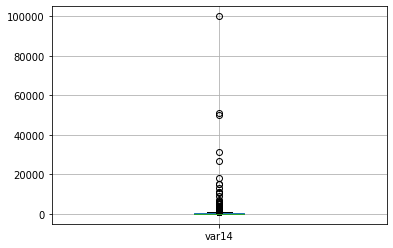

In [188]:
training_df.boxplot(column=['var14'])

In [189]:
sum(training_df['var14'] > 20000)

5

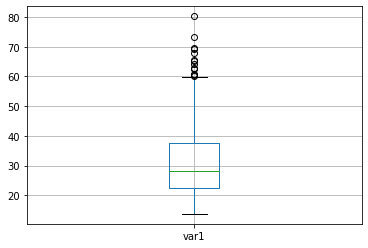

In [190]:
training_df.boxplot(column=['var1'])

In [191]:
sum(training_df['var1'] > 70)

2

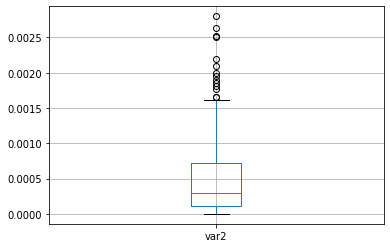

In [192]:
training_df.boxplot(column=['var2'])

In [193]:
sum(training_df['var2'] > 0.0025)

4

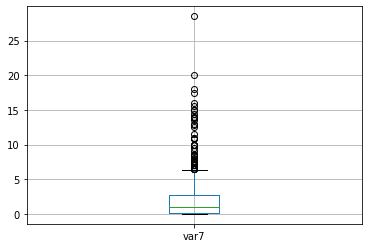

In [194]:
training_df.boxplot(column=['var7'])

In [195]:
sum(training_df['var7'] > 20)

1

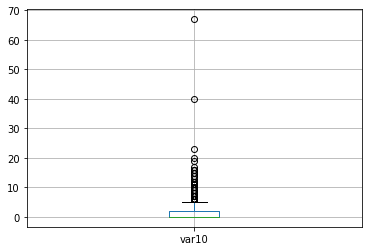

In [196]:
training_df.boxplot(column=['var10'])

In [197]:
sum(training_df['var10'] > 30)

2

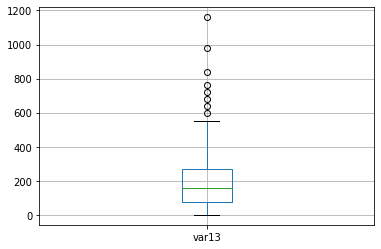

In [198]:
training_df.boxplot(column=['var13'])

In [199]:
sum(training_df['var13'] > 800)

3

In [200]:
training_df.drop(training_df[training_df['var14'] > 20000].index, inplace=True)
training_df.drop(training_df[training_df['var1'] > 70].index, inplace=True)
training_df.drop(training_df[training_df['var2'] > 0.0025].index, inplace=True)
training_df.drop(training_df[training_df['var7'] > 20].index, inplace=True)
training_df.drop(training_df[training_df['var10'] > 30].index, inplace=True)
training_df.drop(training_df[training_df['var13'] > 800].index, inplace=True)
training_df

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,classLabel
0,a,17.92,0.000054,u,g,c,v,1.750,f,t,1,t,g,80.0,5,0,no.
1,b,16.92,0.000034,y,p,k,v,0.290,f,f,0,f,s,200.0,0,0,no.
2,b,31.25,0.000112,u,g,ff,ff,0.000,f,t,1,f,g,96.0,19,0,no.
3,a,48.17,0.000133,u,g,i,o,0.335,f,f,0,f,g,0.0,120,0,no.
4,b,32.33,0.000350,u,g,k,v,0.500,f,f,0,t,g,232.0,0,0,no.
5,a,34.83,0.000125,y,p,i,h,0.500,f,f,0,t,g,160.0,0,0,no.
6,a,26.17,0.000200,u,g,j,j,0.000,f,f,0,t,g,276.0,1,0,no.
7,b,21.17,0.000087,y,p,c,h,0.250,f,f,0,f,g,280.0,204,0,no.
8,b,28.92,0.000037,u,g,c,v,0.290,f,f,0,f,g,220.0,140,0,no.
9,b,18.17,0.001025,u,g,c,h,1.085,f,f,0,f,g,320.0,13,0,no.


In [202]:
sum(training_df['classLabel'] == 'yes.')

200

I decided to fillna with the median rather that the mean because the mean is more sensetive to outliers. Any how there's no big difference as showed above in statistical summary.

In [224]:
training_df.fillna(training_df.median(), inplace=True)
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471 entries, 0 to 489
Data columns (total 17 columns):
var0          463 non-null object
var1          471 non-null float64
var2          471 non-null float64
var3          471 non-null object
var4          471 non-null object
var5          470 non-null object
var6          470 non-null object
var7          471 non-null float64
var8          471 non-null object
var9          471 non-null object
var10         471 non-null int64
var11         471 non-null object
var12         471 non-null object
var13         471 non-null float64
var14         471 non-null int64
var15         471 non-null int64
classLabel    471 non-null object
dtypes: float64(4), int64(3), object(10)
memory usage: 66.2+ KB


Now that we filled all the NaNs in numeric columns. It's time to handle them in non-numeric data. I choose to fill them with the less common category

In [231]:
training_df['var0'].value_counts()

b    314
a    149
Name: var0, dtype: int64

In [237]:
training_df['var0'].fillna('a', inplace=True)

In [238]:
training_df['var5'].value_counts()

c     96
q     55
W     48
ff    43
i     40
k     35
aa    30
m     29
cc    25
x     23
d     19
e     16
j      9
r      2
Name: var5, dtype: int64

In [239]:
training_df['var5'].fillna('r', inplace=True)

In [242]:
training_df['var6'].value_counts()

v     269
h      97
ff     47
bb     37
j       7
dd      5
z       4
n       3
o       1
Name: var6, dtype: int64

In [243]:
training_df['var6'].fillna('o', inplace=True)

In [245]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471 entries, 0 to 489
Data columns (total 17 columns):
var0          471 non-null object
var1          471 non-null float64
var2          471 non-null float64
var3          471 non-null object
var4          471 non-null object
var5          471 non-null object
var6          471 non-null object
var7          471 non-null float64
var8          471 non-null object
var9          471 non-null object
var10         471 non-null int64
var11         471 non-null object
var12         471 non-null object
var13         471 non-null float64
var14         471 non-null int64
var15         471 non-null int64
classLabel    471 non-null object
dtypes: float64(4), int64(3), object(10)
memory usage: 66.2+ KB


Finally the data is clean !. Now we have to represent the non-numeric data in a numeric way. I'll use get_dummies to turn it into one-hot encoding.
Regarding the labels. Later I will use sigmoid function to pridect the output class, so I choose to represent them with one column (1 for yes and 0 for no) rather than two. The 2 columns would be useful in softmax output activation.

In [251]:
training_df = pd.get_dummies(training_df, prefix=[None, '3', '4', '5', '6', '8', '9', '11', '12', 'c'])

In [252]:
training_df.head()

,var1,var2,var7,var10,var13,var14,var15,a,b,3_l,...,8_t,9_f,9_t,11_f,11_t,12_g,12_p,12_s,c_no.,c_yes.
0,17.92,0.000054,1.750,1,80.0,5,0,1,0,0,...,0,0,1,0,1,1,0,0,1,0
1,16.92,0.000034,0.290,0,200.0,0,0,0,1,0,...,0,1,0,1,0,0,0,1,1,0
2,31.25,0.000112,0.000,1,96.0,19,0,0,1,0,...,0,0,1,1,0,1,0,0,1,0
3,48.17,0.000133,0.335,0,0.0,120,0,1,0,0,...,0,1,0,1,0,1,0,0,1,0
4,32.33,0.000350,0.500,0,232.0,0,0,0,1,0,...,0,1,0,0,1,1,0,0,1,0


In [253]:
training_df.columns

Index(['var1', 'var2', 'var7', 'var10', 'var13', 'var14', 'var15', 'a', 'b',
       '3_l', '3_u', '3_y', '4_g', '4_gg', '4_p', '5_W', '5_aa', '5_c', '5_cc',
       '5_d', '5_e', '5_ff', '5_i', '5_j', '5_k', '5_m', '5_q', '5_r', '5_x',
       '6_bb', '6_dd', '6_ff', '6_h', '6_j', '6_n', '6_o', '6_v', '6_z', '8_f',
       '8_t', '9_f', '9_t', '11_f', '11_t', '12_g', '12_p', '12_s', 'c_no.',
       'c_yes.'],
      dtype='object')

In [254]:
training_df.columns = ['var1', 'var2', 'var7', 'var10', 'var13', 'var14', 'var15', 'a', 'b',
       '3_l', '3_u', '3_y', '4_g', '4_gg', '4_p', '5_W', '5_aa', '5_c', '5_cc',
       '5_d', '5_e', '5_ff', '5_i', '5_j', '5_k', '5_m', '5_q', '5_r', '5_x',
       '6_bb', '6_dd', '6_ff', '6_h', '6_j', '6_n', '6_o', '6_v', '6_z', '8_f',
       '8_t', '9_f', '9_t', '11_f', '11_t', '12_g', '12_p', '12_s', 'c_no.',
       'class']

In [257]:
training_df.drop('c_no.', 1, inplace=True)
training_df.head()

,var1,var2,var7,var10,var13,var14,var15,a,b,3_l,...,8_f,8_t,9_f,9_t,11_f,11_t,12_g,12_p,12_s,class
0,17.92,0.000054,1.750,1,80.0,5,0,1,0,0,...,1,0,0,1,0,1,1,0,0,0
1,16.92,0.000034,0.290,0,200.0,0,0,0,1,0,...,1,0,1,0,1,0,0,0,1,0
2,31.25,0.000112,0.000,1,96.0,19,0,0,1,0,...,1,0,0,1,1,0,1,0,0,0
3,48.17,0.000133,0.335,0,0.0,120,0,1,0,0,...,1,0,1,0,1,0,1,0,0,0
4,32.33,0.000350,0.500,0,232.0,0,0,0,1,0,...,1,0,1,0,0,1,1,0,0,0


At last it's time to save the clean dataframe into csv_file

In [260]:
training_df.to_csv("train_clean.csv")

In [3]:
clean_df = pd.read_csv("train_clean.csv")

In [4]:
clean_df.mean()

Unnamed: 0    244.263270
var1           30.913206
var2            0.000462
var7            2.257771
var10           2.070064
var13         170.048832
var14         657.492569
var15           0.424628
a               0.333333
b               0.666667
3_l             0.002123
3_u             0.762208
3_y             0.235669
4_g             0.762208
4_gg            0.002123
4_p             0.235669
5_W             0.101911
5_aa            0.063694
5_c             0.203822
5_cc            0.053079
5_d             0.040340
5_e             0.033970
5_ff            0.091295
5_i             0.084926
5_j             0.019108
5_k             0.074310
5_m             0.061571
5_q             0.116773
5_r             0.006369
5_x             0.048832
6_bb            0.078556
6_dd            0.010616
6_ff            0.099788
6_h             0.205945
6_j             0.014862
6_n             0.006369
6_o             0.004246
6_v             0.571125
6_z             0.008493
8_f             0.505308


In [6]:
clean_df.describe()

,Unnamed: 0,var1,var2,var7,var10,var13,var14,var15,a,b,...,8_f,8_t,9_f,9_t,11_f,11_t,12_g,12_p,12_s,class
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,...,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,244.263270,30.913206,0.000462,2.257771,2.070064,170.048832,657.492569,0.424628,0.333333,0.666667,...,0.505308,0.494692,0.594480,0.405520,0.560510,0.439490,0.917197,0.002123,0.080679,0.424628
std,141.592698,11.265351,0.000454,3.361196,3.850031,137.412811,1962.387448,0.494812,0.471906,0.471906,...,0.500503,0.500503,0.491514,0.491514,0.496853,0.496853,0.275877,0.046078,0.272632,0.494812
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,121.500000,22.540000,0.000106,0.165000,0.000000,78.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,244.000000,27.830000,0.000275,1.000000,0.000000,160.000000,4.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,367.500000,36.750000,0.000700,2.605000,2.000000,260.000000,313.500000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,489.000000,69.500000,0.002100,20.000000,23.000000,720.000000,18027.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
import matplotlib.pyplot as plt

(array([ 1.,  0.,  1.,  3.,  6.,  2.,  2., 11.,  8., 11.,  7., 15., 15.,
        15.,  9., 13., 24., 19.,  5., 13., 13., 10.,  5., 11.,  9., 18.,
        13.,  5., 10.,  6.,  5.,  4., 10.,  8.,  9.,  6.,  7.,  8.,  5.,
         3.,  5.,  5.,  7.,  3.,  4.,  4.,  6.,  2.,  6.,  7.,  2.,  2.,
         6.,  0.,  4.,  1.,  4.,  2.,  0.,  3.,  5.,  2.,  4.,  2.,  3.,
         2.,  1.,  1.,  3.,  4.,  2.,  0.,  1.,  1.,  0.,  3.,  2.,  2.,
         1.,  1.,  1.,  0.,  1.,  1.,  2.,  0.,  0.,  2.,  0.,  0.,  1.,
         0.,  2.,  0.,  0.,  0.,  1.,  0.,  0.,  2.]),
 array([13.75  , 14.3075, 14.865 , 15.4225, 15.98  , 16.5375, 17.095 ,
        17.6525, 18.21  , 18.7675, 19.325 , 19.8825, 20.44  , 20.9975,
        21.555 , 22.1125, 22.67  , 23.2275, 23.785 , 24.3425, 24.9   ,
        25.4575, 26.015 , 26.5725, 27.13  , 27.6875, 28.245 , 28.8025,
        29.36  , 29.9175, 30.475 , 31.0325, 31.59  , 32.1475, 32.705 ,
        33.2625, 33.82  , 34.3775, 34.935 , 35.4925, 36.05  , 36.6075,
        

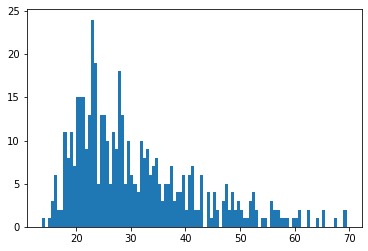

In [13]:
plt.hist(clean_df['var1'], bins=100)

In [11]:
scaled1 = (clean_df['var1'] - clean_df['var1'].min())/(clean_df['var1'].max()-clean_df['var1'].min())

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  2.,  2.,  3.,  1.,
         0.,  2.,  1.,  0.,  2.,  4.,  6.,  3.,  4.,  5.,  3.,  4.,  5.,
         2.,  0.,  9.,  6.,  2., 13.,  5.,  5.,  5.,  1.,  3.,  8.,  5.,
         5., 10., 12.,  6.,  7.,  8.,  2.,  2.,  2.,  6.,  6.,  5.,  6.,
         3.,  6.,  2.,  4.,  2.,  1.,  6.,  4.,  2.,  1.,  6., 13.,  5.,
         5.,  3.,  5.,  2.,  3.,  5.,  2.,  4.,  2.,  3.,  2.,  2.,  1.,
         2.,  2.,  3.,  3.,  5.,  5.,  0.,  4.,  2.,  5.,  0.,  6.,  0.,
         5.,  3.,  0.,  5.,  3.,  4.,  0.,  2.,  1.]),
 array([0.        , 0.00399103, 0.00798206, 0.01197309, 0.01596413,
        0.01995516, 0.02394619, 0.02793722, 0.03192825, 0.03591928,
        0.03991031, 0.04390135, 0.04789238, 0.05188341, 0.05587444,
        0.05986547, 0.0638565 , 0.06784753, 0.07183857, 0.0758296 ,
        0.07982063, 0.08381166, 0.08780269, 0.09179372, 0.09578475,
        0.09977578, 0.10376682, 0.10775785, 0.11174888, 0.11573991,
        0.11973094, 0.1237

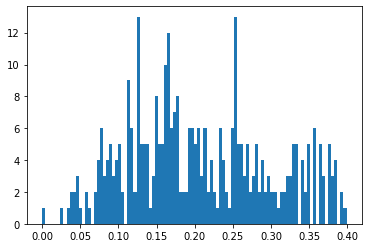

In [23]:
plt.hist(scaled1[scaled1], bins=100)

In [285]:
training_df['var1'].quantile()

27.83

In [43]:
scaler = pd.read_csv("scaler.csv", index_col=0)
validation_df = pd.read_csv(validation_csv, sep=";", decimal = ',')
validation_df.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,b,32.33,0.000750,u,g,e,bb,1.585,t,f,0,t,s,420.0,0,4200000.0,NaN,1,no.
1,b,23.58,0.000179,u,g,c,v,0.540,f,f,0,t,g,136.0,1,1360000.0,NaN,0,no.
2,b,36.42,0.000075,y,p,d,v,0.585,f,f,0,f,g,240.0,3,2400000.0,NaN,1,no.
3,b,18.42,0.001041,y,p,aa,v,0.125,t,f,0,f,g,120.0,375,1200000.0,NaN,0,no.
4,b,24.50,0.001334,y,p,aa,v,0.040,f,f,0,t,g,120.0,475,1200000.0,f,1,no.


In [44]:
validation_df.drop('variable17', 1, inplace=True)
validation_df.columns = ['var'+str(i) for i in range(len(validation_df.columns) - 1)] + ['classLabel']
validation_df.drop('var15', 1, inplace=True)
validation_df.columns = ['var'+str(i) for i in range(len(validation_df.columns) - 1)] + ['classLabel']
validation_df.drop_duplicates(inplace=True)
validation_df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,classLabel
0,b,32.33,0.000750,u,g,e,bb,1.585,t,f,0,t,s,420.0,0,1,no.
1,b,23.58,0.000179,u,g,c,v,0.540,f,f,0,t,g,136.0,1,0,no.
2,b,36.42,0.000075,y,p,d,v,0.585,f,f,0,f,g,240.0,3,1,no.
3,b,18.42,0.001041,y,p,aa,v,0.125,t,f,0,f,g,120.0,375,0,no.
4,b,24.50,0.001334,y,p,aa,v,0.040,f,f,0,t,g,120.0,475,1,no.


In [45]:
validation_df['var0'].fillna('a', inplace=True)
validation_df['var5'].fillna('r', inplace=True)
validation_df['var6'].fillna('o', inplace=True)
validation_df = pd.get_dummies(validation_df, prefix=[None, '3', '4', '5', '6', '8', '9', '11', '12', 'c'])
validation_df.fillna(scaler.loc['50%', :], inplace=True)
validation_df.head()

,var1,var2,var7,var10,var13,var14,var15,a,b,3_u,...,8_t,9_f,9_t,11_f,11_t,12_g,12_p,12_s,c_no.,c_yes.
0,32.33,0.000750,1.585,0,420.0,0,1,0,1,1,...,1,1,0,0,1,0,0,1,1,0
1,23.58,0.000179,0.540,0,136.0,1,0,0,1,1,...,0,1,0,0,1,1,0,0,1,0
2,36.42,0.000075,0.585,0,240.0,3,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
3,18.42,0.001041,0.125,0,120.0,375,0,0,1,0,...,1,1,0,1,0,1,0,0,1,0
4,24.50,0.001334,0.040,0,120.0,475,1,0,1,0,...,0,1,0,0,1,1,0,0,1,0


In [46]:
validation_df.columns

Index(['var1', 'var2', 'var7', 'var10', 'var13', 'var14', 'var15', 'a', 'b',
       '3_u', '3_y', '4_g', '4_p', '5_W', '5_aa', '5_c', '5_cc', '5_d', '5_e',
       '5_ff', '5_i', '5_j', '5_k', '5_m', '5_q', '5_r', '5_x', '6_bb', '6_dd',
       '6_ff', '6_h', '6_j', '6_n', '6_o', '6_v', '6_z', '8_f', '8_t', '9_f',
       '9_t', '11_f', '11_t', '12_g', '12_p', '12_s', 'c_no.', 'c_yes.'],
      dtype='object')

In [47]:
validation_df.drop('c_no.', 1, inplace=True)
validation_df.columns = ['var1', 'var2', 'var7', 'var10', 'var13', 'var14', 'var15', 'a', 'b',
       '3_u', '3_y', '4_g', '4_p', '5_W', '5_aa', '5_c', '5_cc',
       '5_d', '5_e', '5_ff', '5_i', '5_j', '5_k', '5_m', '5_q', '5_r', '5_x',
       '6_bb', '6_dd', '6_ff', '6_h', '6_j', '6_n', '6_o', '6_v', '6_z', '8_f',
       '8_t', '9_f', '9_t', '11_f', '11_t', '12_g', '12_p', '12_s', 'class']

In [61]:
z = pd.Series(np.zeros(len(validation_df)))
validation_df.insert(validation_df.columns.get_loc("3_u"), "3_l", z, True)
validation_df.columns

Index(['var1', 'var2', 'var7', 'var10', 'var13', 'var14', 'var15', 'a', 'b',
       '3_l', '3_u', '3_y', '4_g', '4_p', '5_W', '5_aa', '5_c', '5_cc', '5_d',
       '5_e', '5_ff', '5_i', '5_j', '5_k', '5_m', '5_q', '5_r', '5_x', '6_bb',
       '6_dd', '6_ff', '6_h', '6_j', '6_n', '6_o', '6_v', '6_z', '8_f', '8_t',
       '9_f', '9_t', '11_f', '11_t', '12_g', '12_p', '12_s', 'class'],
      dtype='object')

In [62]:
validation_df.insert(validation_df.columns.get_loc("4_p"), "4_gg", z, True)
validation_df.columns

Index(['var1', 'var2', 'var7', 'var10', 'var13', 'var14', 'var15', 'a', 'b',
       '3_l', '3_u', '3_y', '4_g', '4_gg', '4_p', '5_W', '5_aa', '5_c', '5_cc',
       '5_d', '5_e', '5_ff', '5_i', '5_j', '5_k', '5_m', '5_q', '5_r', '5_x',
       '6_bb', '6_dd', '6_ff', '6_h', '6_j', '6_n', '6_o', '6_v', '6_z', '8_f',
       '8_t', '9_f', '9_t', '11_f', '11_t', '12_g', '12_p', '12_s', 'class'],
      dtype='object')

In [63]:
validation_df.head()

,var1,var2,var7,var10,var13,var14,var15,a,b,3_l,...,8_f,8_t,9_f,9_t,11_f,11_t,12_g,12_p,12_s,class
0,32.33,0.000750,1.585,0,420.0,0,1,0,1,0.0,...,0,1,1,0,0,1,0,0,1,0
1,23.58,0.000179,0.540,0,136.0,1,0,0,1,0.0,...,1,0,1,0,0,1,1,0,0,0
2,36.42,0.000075,0.585,0,240.0,3,1,0,1,0.0,...,1,0,1,0,1,0,1,0,0,0
3,18.42,0.001041,0.125,0,120.0,375,0,0,1,0.0,...,0,1,1,0,1,0,1,0,0,0
4,24.50,0.001334,0.040,0,120.0,475,1,0,1,0.0,...,1,0,1,0,0,1,1,0,0,0


In [65]:
validation_df.to_csv("val_clean.csv")